<a href="https://colab.research.google.com/github/Bhavithasri04/Asthma-Disease-Prediction/blob/main/Asthma_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/python/asthma.csv')

In [4]:
data

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [5]:
data.shape

(316800, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [7]:
data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [8]:
data.tail()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316799,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [9]:
data.describe()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.250000,0.250000,0.250000
std,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.433013,0.433013,0.433013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.250000,0.250000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data["Gender_Female"].value_counts()

,count
Gender_Female,
0,211200
1,105600


In [11]:
data["Gender_Male"].value_counts()

,count
Gender_Male,
0,211200
1,105600


In [12]:
data["Severity_Mild"].value_counts()

,count
Severity_Mild,
0,237600
1,79200


In [13]:
data["Severity_Moderate"].value_counts()

,count
Severity_Moderate,
0,237600
1,79200


In [14]:
data["Severity_None"].value_counts()

,count
Severity_None,
0,237600
1,79200


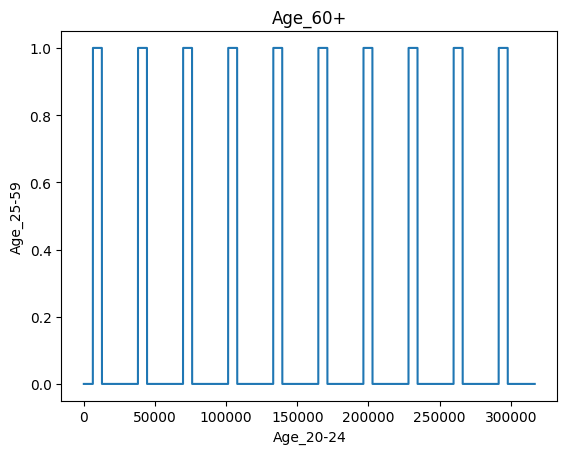

In [15]:
import matplotlib.pyplot as plt

# Line plot
plt.plot(data['Age_10-19'])
plt.xlabel("Age_20-24")
plt.ylabel("Age_25-59")
plt.title("Age_60+")
plt.show()

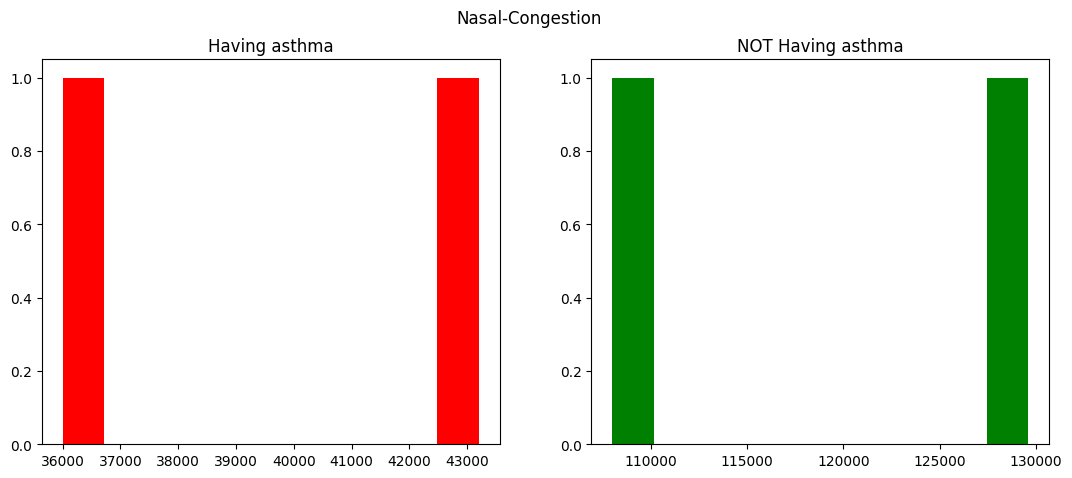

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Severity_None']==1]['Nasal-Congestion'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('Having asthma')

data_len=data[data['Severity_None']==0]['Nasal-Congestion'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having asthma')

fig.suptitle('Nasal-Congestion')
plt.show()

In [17]:
data.duplicated()

,0
0,False
1,True
2,True
3,False
4,True
...,...
316795,True
316796,True
316797,True
316798,True


In [18]:
newdata=data.drop_duplicates()
newdata

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1
24,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31665,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
31668,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
31671,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
31674,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [19]:
data.isnull().sum() #checking for total null values

,0
Tiredness,0
Dry-Cough,0
Difficulty-in-Breathing,0
Sore-Throat,0
None_Sympton,0
Pains,0
Nasal-Congestion,0
Runny-Nose,0
None_Experiencing,0
Age_0-9,0


In [20]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Difficulty-in-Breathing", "Dry-Cough", "Tiredness", "Sore-Throat"])
scaled_df.head()

,Difficulty-in-Breathing,Dry-Cough,Tiredness,Sore-Throat
0,0.002369,0.002513,0.003178,0.0
1,0.002369,0.002513,0.003178,0.0
2,0.002369,0.002513,0.003178,0.0
3,0.002369,0.002513,0.003178,0.0
4,0.002369,0.002513,0.003178,0.0


In [21]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression

train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Severity_None'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['Severity_None']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(221760, 221760, 95040, 95040)

In [22]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression is 0.7478640572390572
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84     71280
           1       0.49      0.35      0.41     23760

    accuracy                           0.75     95040
   macro avg       0.65      0.61      0.62     95040
weighted avg       0.72      0.75      0.73     95040



In [24]:
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Assuming 'test_Y' contains the true labels for the test set
# Calculate the accuracy
accuracy = accuracy_score(test_Y, prediction.round())

# Print the accuracy
print('The accuracy of Linear Regression is:', accuracy)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model using various metrics
mse = mean_squared_error(test_Y, prediction)
rmse = mse ** 0.5  # manually compute RMSE
mae = mean_absolute_error(test_Y, prediction)
r_squared = r2_score(test_Y, prediction)

print('Mean Squared Error                  : ', mse)
print('Root Mean Squared Error             : ', rmse)
print('Mean Absolute Error                 : ', mae)
print('R-Squared                           : ', r_squared)


The accuracy of Linear Regression is: 0.748169191919192
Mean Squared Error                  :  0.12436897160963276
Root Mean Squared Error             :  0.352659852562824
Mean Absolute Error                 :  0.2493731778394861
R-Squared                           :  0.33669881808195856
